In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as stm
import math

In [65]:
os.chdir(r'D:\DS\Machine learning\Datasets')

In [66]:
conc=pd.read_csv('concrete.csv')

In [67]:
conc.columns=['Cement','BFS','FlyAsh','Water','Admix','CA','FA','Age','CompressiveStrength']

In [68]:
conc.shape

(1030, 9)

In [69]:
conc.isna().sum()

Cement                 0
BFS                    0
FlyAsh                 0
Water                  0
Admix                  0
CA                     0
FA                     0
Age                    0
CompressiveStrength    0
dtype: int64

In [70]:
conc.head()

,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [71]:
conc.drop_duplicates(subset=['Cement','BFS','FlyAsh','Water','Admix','CA','FA','Age'],inplace=True)

In [72]:
conc.shape

(992, 9)

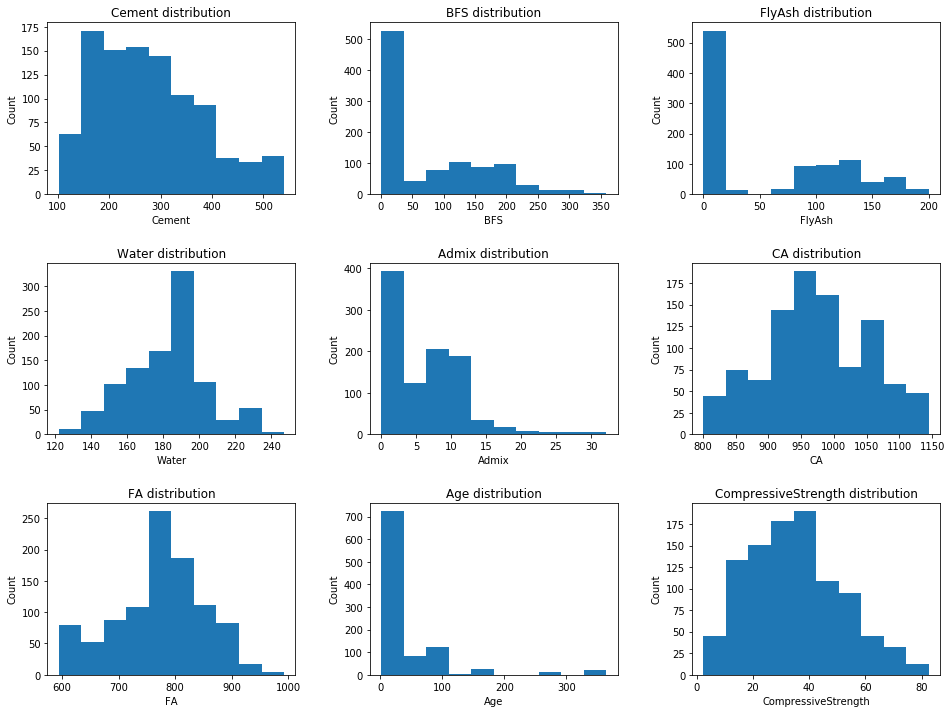

In [73]:
cols=conc.columns
j=1
plt.figure(figsize=(16,12))
for i in cols:
    plt.subplot(3,3,j)
    j+=1
    plt.hist(i,data=conc)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('%s distribution'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

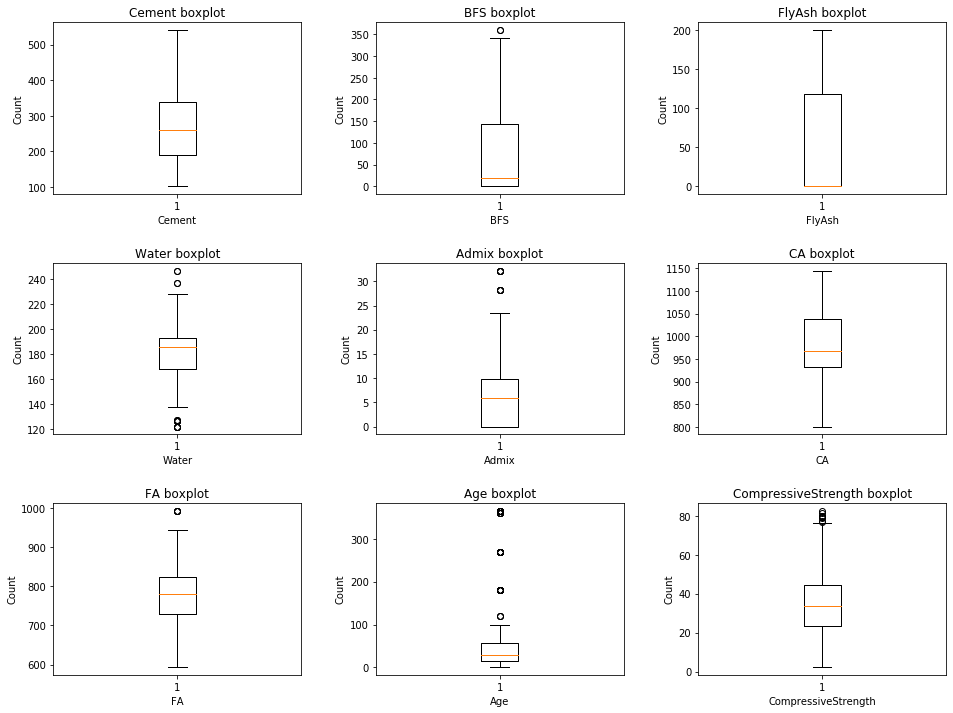

In [11]:
cols=conc.columns
j=1
plt.figure(figsize=(16,12))
for i in cols:
    plt.subplot(3,3,j)
    j+=1
    plt.boxplot(i,data=conc)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('%s boxplot'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

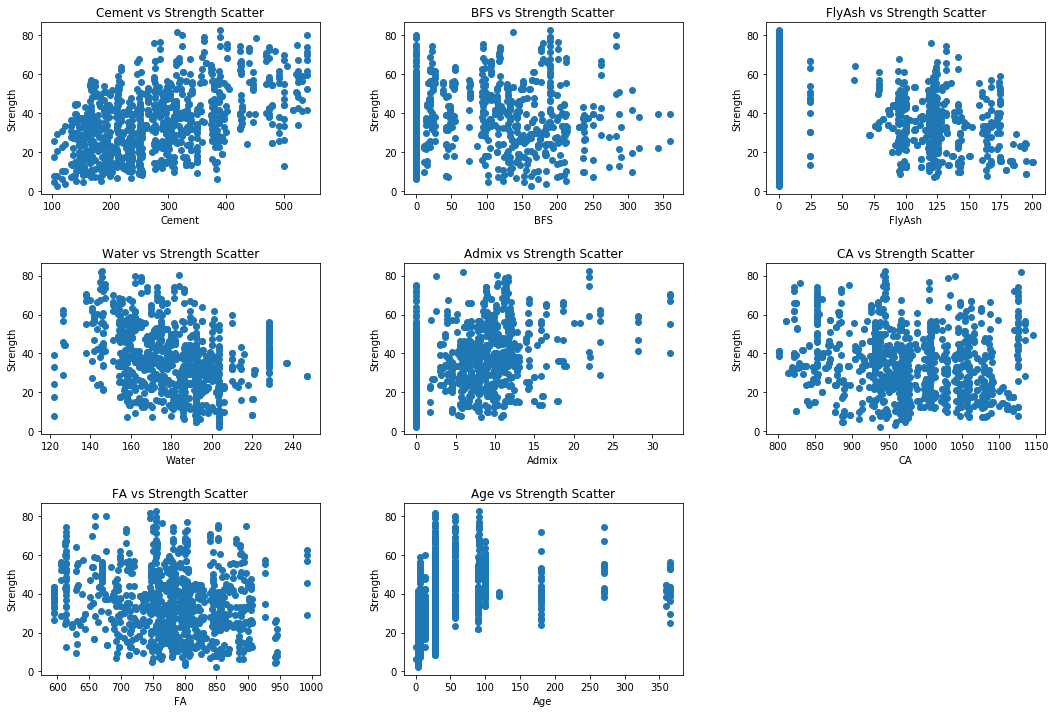

In [75]:
#Scatter plots
conc2=conc.copy()
conc2.drop(columns='CompressiveStrength',axis=1,inplace=True)
cols=conc2.columns
j=1
plt.figure(figsize=(18,12))
for i in cols:
    plt.subplot(3,3,j)
    j+=1
    plt.scatter(i,'CompressiveStrength',data=conc)
    plt.xlabel(i)
    plt.ylabel('Strength')
    plt.title('%s vs Strength Scatter'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

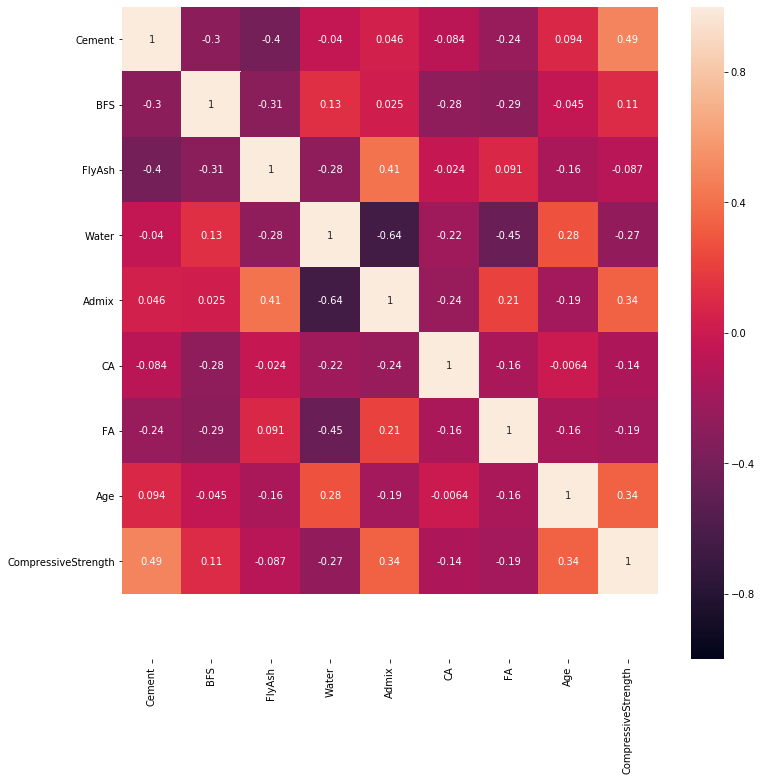

In [13]:
#Correlation between variables
plt.figure(figsize=(12,12))
ax=sb.heatmap(conc.corr(),vmin=-1,vmax=1,annot=True)
ax.set_ylim(10.0, 0)
plt.yticks(rotation=0)
plt.show()

In [19]:
#Fitting OLS using all columns
xtest=conc.loc[:,['Cement','BFS','FlyAsh','Admix','Water','CA','FA','Age']]
ytest=conc.loc[:,['CompressiveStrength']]
xtest=stm.add_constant(xtest)
model=stm.OLS(ytest,xtest).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.613
Model:                             OLS   Adj. R-squared:                  0.609
Method:                  Least Squares   F-statistic:                     194.3
Date:                 Wed, 30 Oct 2019   Prob (F-statistic):          1.74e-196
Time:                         17:54:45   Log-Likelihood:                -3704.9
No. Observations:                  992   AIC:                             7428.
Df Residuals:                      983   BIC:                             7472.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.5913     26.180     -0.557      0.577     -65.967      36.784
Cement         0.1189      0.008     14.098      0.000       0.102       0.135
BFS            0.0995      0.010      9.884      0.000       0.080       0.119
FlyAsh         0.0865      0.012      6.975      0.000       0.062       0.111
Admix          0.2814      0.092      3.056      0.002       0.101       0.462
Water         -0.1603      0.039     -4.062      0.000      -0.238      -0.083
CA             0.0148      0.009      1.600      0.110      -0.003       0.033
FA             0.0167      0.011      1.576      0.115      -0.004       0.037
Age            0.1110      0.005     20.776      0.000       0.100       0.121
==============================================================================
Omnibus:                        3.259   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.178
Skew:                          -0.138   Prob(JB):                        0.204
Kurtosis:                       3.035   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

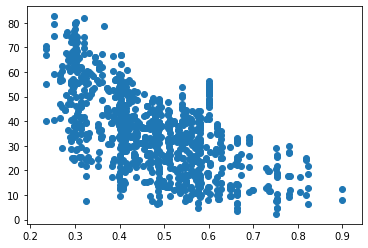

In [78]:
conc['Cementitious']=conc['Cement']+conc['FlyAsh']+conc['BFS']
conc['W/C']=conc['Water']/conc['Cementitious']
plt.scatter('W/C','CompressiveStrength',data=conc)

In [79]:
xtest=conc.loc[:,['W/C','Admix','Age']]
ytest=conc.loc[:,['CompressiveStrength']]
xtest=stm.add_constant(xtest)
model=stm.OLS(ytest,xtest).fit() #ordinary least squares regression
model.summary()

D:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.568
Model:                             OLS   Adj. R-squared:                  0.567
Method:                  Least Squares   F-statistic:                     433.3
Date:                 Wed, 30 Oct 2019   Prob (F-statistic):          1.37e-179
Time:                         22:36:16   Log-Likelihood:                -3758.8
No. Observations:                  992   AIC:                             7526.
Df Residuals:                      988   BIC:                             7545.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4040      1.910     36.339      0.000      65.656      73.152
W/C          -84.8236      3.349    -25.329      0.000     -91.395     -78.252
Admix          0.1474      0.071      2.077      0.038       0.008       0.287
Age            0.1129      0.005     20.817      0.000       0.102       0.124
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.715
Skew:                          -0.064   Prob(JB):                        0.699
Kurtosis:                       2.974   Cond. No.                         887.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
conc.head()

,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,CompressiveStrength,Cementitious,W/C
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,540.0,0.30000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,540.0,0.30000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,475.0,0.48000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,475.0,0.48000
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,331.0,0.58006


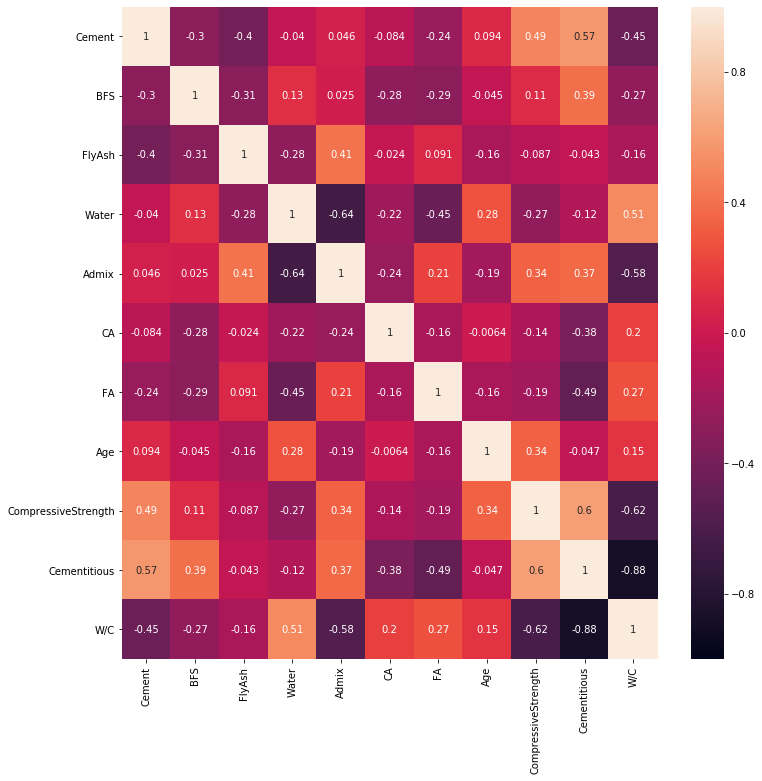

In [83]:
#Heatmap with added variables
plt.figure(figsize=(12,12))
ax=sb.heatmap(conc.corr(),vmin=-1,vmax=1,annot=True)
ax.set_ylim(11.0, 0)
plt.yticks(rotation=0)
plt.show()

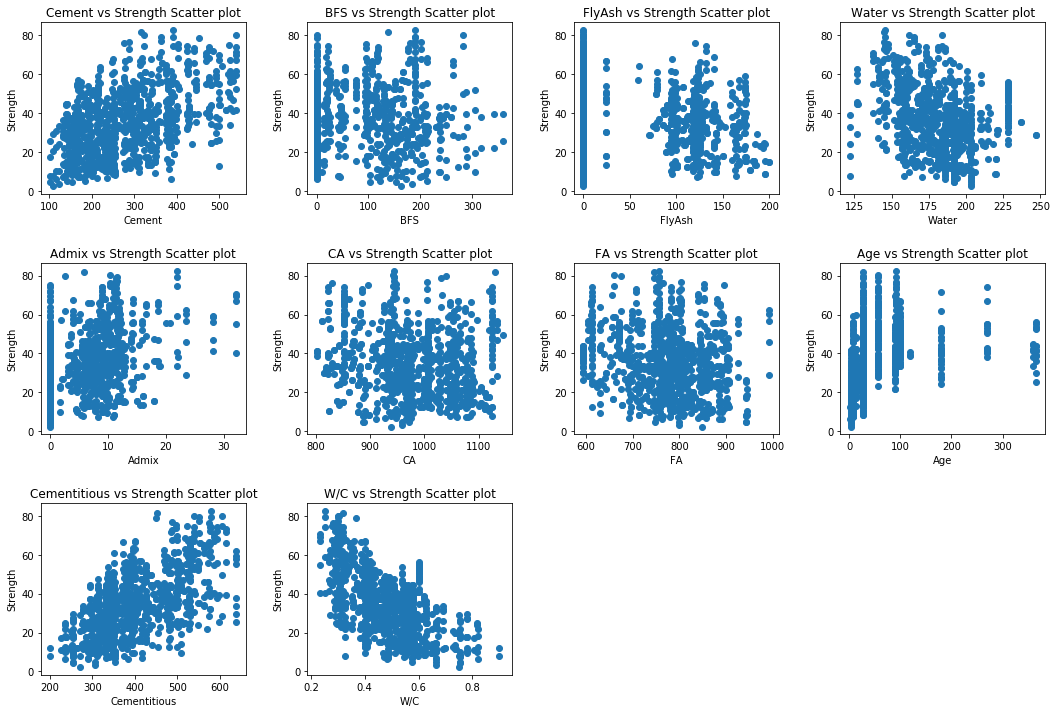

In [84]:
conc2=conc.copy()
conc2.drop(columns='CompressiveStrength',axis=1,inplace=True)
cols=conc2.columns
j=1
plt.figure(figsize=(18,12))
for i in cols:
    plt.subplot(3,4,j)
    j+=1
    plt.scatter(i,'CompressiveStrength',data=conc)
    plt.xlabel(i)
    plt.ylabel('Strength')
    plt.title('%s vs Strength Scatter plot'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

In [85]:
conc3=conc.copy()
conc3.drop_duplicates(subset=['Cement','BFS','FlyAsh','Water','Admix','CA','FA','Age'])

,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,CompressiveStrength,Cementitious,W/C
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,540.0,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,540.0,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,475.0,0.480000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,475.0,0.480000
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,331.0,0.580060
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,482.7,0.372074
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,437.8,0.447693
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,396.5,0.486003
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,345.8,0.507808


In [86]:
conc3.shape

(992, 11)

In [87]:
import numpy as np

In [93]:
conc3['Lage']=np.log(conc3['Age'])
conc3['LW/C']=np.log(conc3['W/C'])

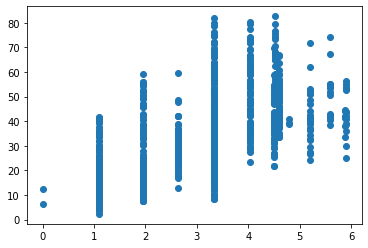

In [95]:
plt.scatter('Lage','CompressiveStrength',data=conc3)

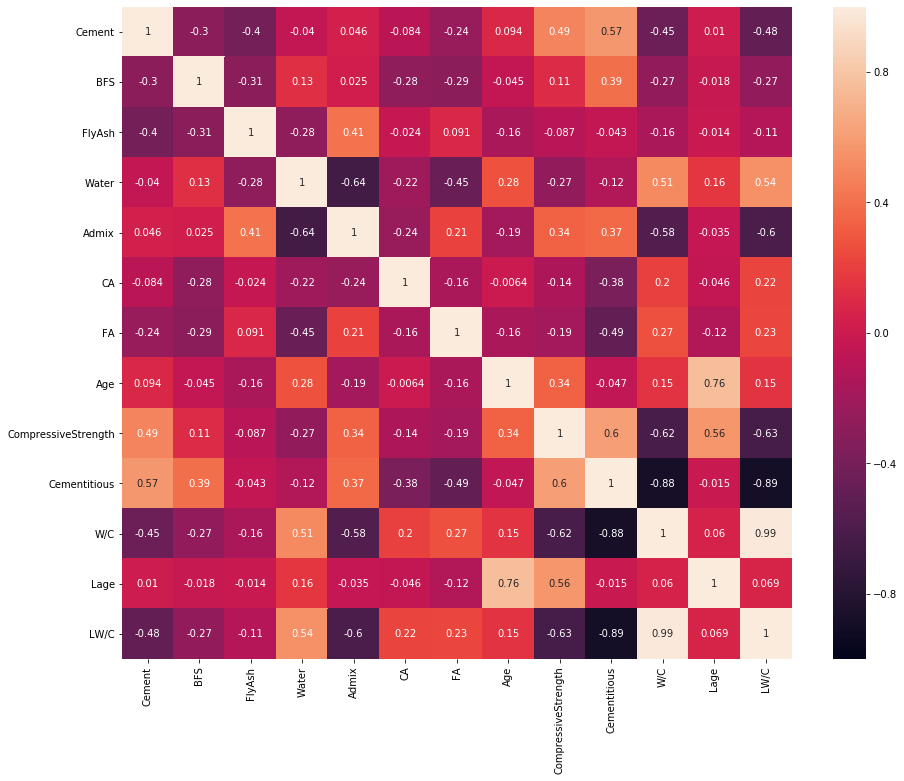

In [97]:
plt.figure(figsize=(15,12))
ax=sb.heatmap(conc3.corr(),vmin=-1,vmax=1,annot=True)
ax.set_ylim(13.0, 0)
plt.yticks(rotation=0)
plt.show()

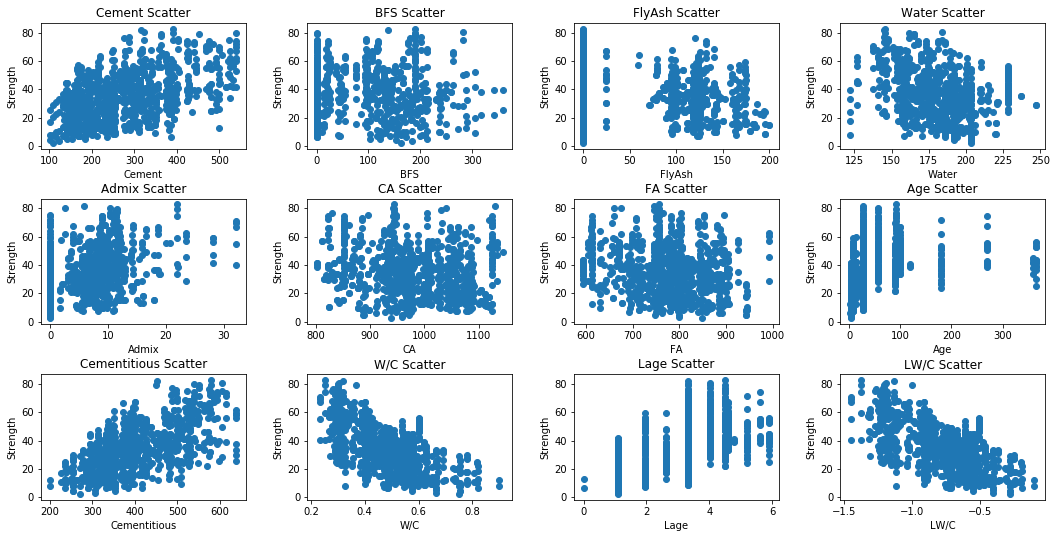

In [99]:
conc5=conc3.copy()
conc5.drop(columns='CompressiveStrength',axis=1,inplace=True)
cols=conc5.columns
j=1
plt.figure(figsize=(18,12))
for i in cols:
    plt.subplot(4,4,j)
    j+=1
    plt.scatter(i,'CompressiveStrength',data=conc3)
    plt.xlabel(i)
    plt.ylabel('Strength')
    plt.title('%s Scatter'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

In [101]:
xtest=conc3.loc[:,['LW/C','Lage']]
ytest=conc3.loc[:,['CompressiveStrength']]
xtest=stm.add_constant(xtest)
model=stm.OLS(ytest,xtest).fit() #ordinary least squares regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     1660.
Date:                 Wed, 30 Oct 2019   Prob (F-statistic):          9.34e-317
Time:                         22:41:18   Log-Likelihood:                -3445.3
No. Observations:                  992   AIC:                             6897.
Df Residuals:                      989   BIC:                             6911.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.3546      1.046    -22.334      0.000     -25.407     -21.303
LW/C         -41.0526      0.929    -44.185      0.000     -42.876     -39.229
Lage           8.3607      0.209     39.937      0.000       7.950       8.771
==============================================================================
Omnibus:                       14.700   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.127
Skew:                          -0.003   Prob(JB):                     3.50e-06
Kurtosis:                       3.780   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(conc3,conc3['CompressiveStrength'],test_size=0.15,random_state=0)

In [114]:
X_train.head()

,const,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,CompressiveStrength,Cementitious,W/C,Lage,LW/C
308,1.0,277.1,0.0,97.4,160.6,11.8,973.9,875.6,100,55.64,374.5,0.428838,4.605170,-0.846675
770,1.0,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99,349.0,0.550143,1.098612,-0.597577
970,1.0,314.0,145.3,113.2,178.9,8.0,869.1,690.2,28,46.23,572.5,0.312489,3.332205,-1.163186
504,1.0,491.0,26.0,123.0,201.0,3.9,822.0,699.0,3,29.55,640.0,0.314063,1.098612,-1.158163
890,1.0,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,353.0,0.623229,3.332205,-0.472841


In [116]:
X_train=X_train.loc[:,['LW/C','Lage']]
X_train=stm.add_constant(X_train)

In [117]:
model=stm.OLS(y_train,X_train).fit() #ordinary least squares regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.774
Model:                             OLS   Adj. R-squared:                  0.774
Method:                  Least Squares   F-statistic:                     1439.
Date:                 Wed, 30 Oct 2019   Prob (F-statistic):          4.34e-272
Time:                         22:49:29   Log-Likelihood:                -2917.0
No. Observations:                  843   AIC:                             5840.
Df Residuals:                      840   BIC:                             5854.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.1513      1.123    -20.624      0.000     -25.355     -20.948
LW/C         -41.1298      0.984    -41.799      0.000     -43.061     -39.198
Lage           8.2377      0.223     36.935      0.000       7.800       8.675
==============================================================================
Omnibus:                       10.268   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               14.615
Skew:                          -0.096   Prob(JB):                     0.000671
Kurtosis:                       3.616   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
X_test=X_test.loc[:,['LW/C','Lage']]
X_test = stm.add_constant(X_test)
pred = model.predict(X_test)
#RSS
np.sum((np.exp(pred) - np.exp(y_test))**2)

2.7867836691897786e+68

In [122]:
rss=0
for i in pred-y_test:
    rss=rss+i**2
print(rss)

10401.3045388248
